<a href="https://colab.research.google.com/github/bhargav-borah/LinearReg-FromScratch/blob/main/linear_regression__from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Defining the LinearRegressor class

In [169]:
class LinearRegressor:

  def __init__(self, learning_rate = 0.001, epochs = 1000):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weight = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    for _ in range(self.epochs):
      y_pred = np.dot(X, self.weights) + self.bias

      dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
      db = (2 / n_samples) * np.sum(y_pred - y)

      self.weights = self.weights - self.learning_rate * dw
      self.bias = self.bias - self.learning_rate * db

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

  def mse(self, y_test, y_pred):
    return np.mean((y_test - y_pred) ** 2)

  def r2_score(self, y_test, y_pred):
    val = np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - val

## Importing the data set

In [170]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the data set into the Training set and the Test set

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the Linear Regression model on the Training set

In [172]:
regressor = LinearRegressor(learning_rate=0.01)
regressor.fit(X_train, y_train)

## Predicting the Test set results

In [173]:
y_pred = regressor.predict(X_test)
print(np.concatenate((y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), axis = 1))

[[ 37731.          40726.60385467]
 [122391.         123893.61992807]
 [ 57081.          65298.67678545]
 [ 63218.          63408.51732924]
 [116969.         116332.98210322]
 [109431.         108772.34427836]
 [112635.         117278.06183132]
 [ 55794.          64353.59705734]]


## Visualising the Training set results

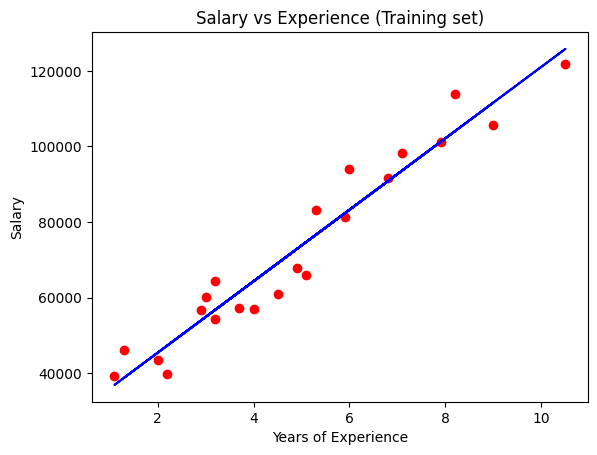

In [174]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Visualising the Test set results

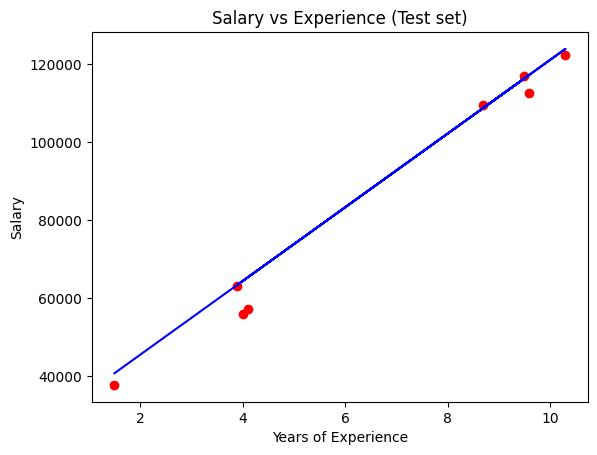

In [175]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Mean Squared Error

In [176]:
from sklearn.metrics import mean_squared_error
print(regressor.mse(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

21807636.097934574
21807636.097934574


##  R2 Score

In [177]:
from sklearn.metrics import r2_score
print(regressor.r2_score(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.9785123298086768
0.9785123298086768
